<a href="https://colab.research.google.com/github/tabishjamal/titanic_dataset-kaggle/blob/main/analysis_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading using Kaggle API

To download kaggle.json file:

Go to your kaggle account, Scroll to API section and Click on Create New API Token -  kaggle.json file will be downloaded on your machine.

**uncomment below cell to download dataset from kaggle automatically**

In [52]:
# !pip install --upgrade --force-reinstall --no-deps kaggle
# !pip install -q kaggle
# from google.colab import files
# files.upload()
# !pip install --upgrade --force-reinstall --no-deps kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list
# !kaggle competitions download -c titanic
# !unzip titanic.zip -d train

## Importing packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Data Analysis and Data Cleaning

In [3]:
df=pd.read_csv('train/train.csv')

In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Spencer, Mrs. William Augustus (Marie Eugenie)",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
df.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

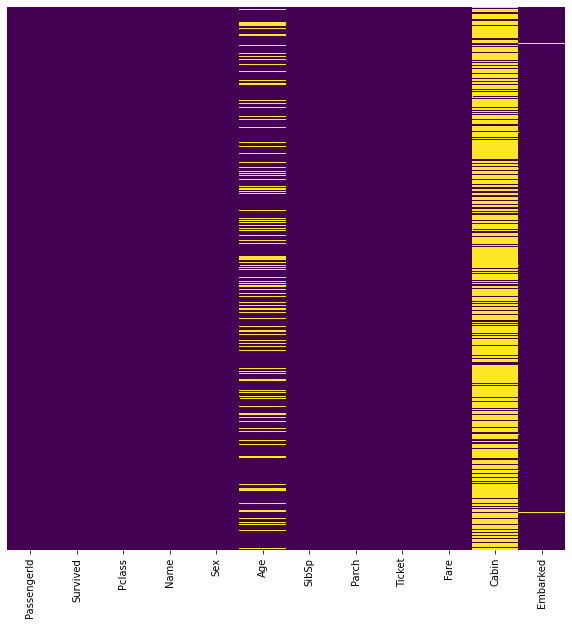

In [10]:
# Missing values using Heatmap
plt.figure(figsize= (10,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
# Finding duplicates
df[df.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


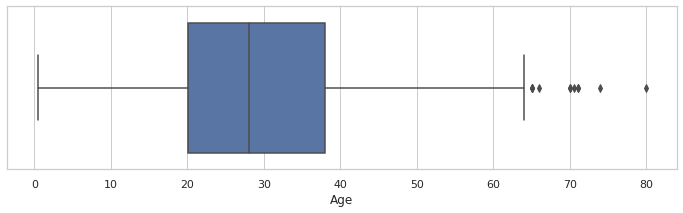

In [12]:
# Outlier Detection
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Age"])

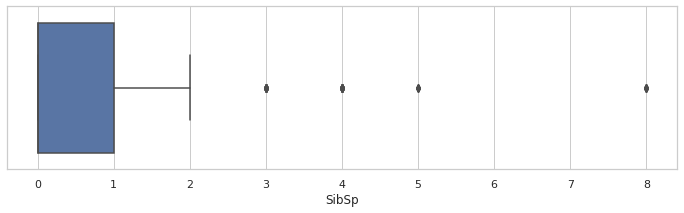

In [13]:
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["SibSp"])

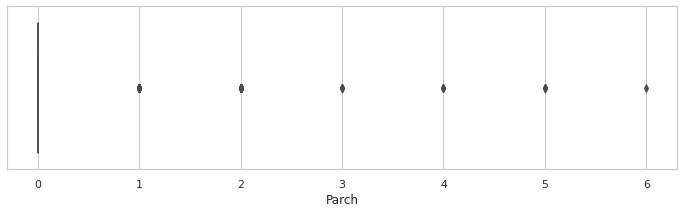

In [14]:
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Parch"])

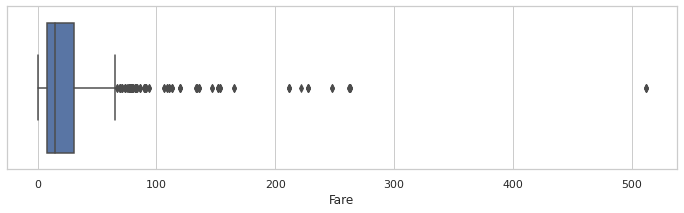

In [15]:
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Fare"])

Age, Pclass, Parch -- should be categorical

In [16]:
#Missing values treatment
age_mode = df['Age'].mode().iloc[0]
emb_mode = df['Embarked'].mode().iloc[0]

df['Age'] = df['Age'].fillna(age_mode)
df['Embarked'] = df['Embarked'].fillna(emb_mode)
df['Cabin'] = df['Cabin'].fillna('NA')

In [17]:
# create a list of our conditions to fill column 'Sex'
conditions = [
    (df['Sex'] == 'male'),
    (df['Sex'] == 'female')
    ]

# create a list of the values we want to assign for each condition
values = [0 , 1]

# Fill existing column by using np.select to assign values to it using our lists as arguments
df['Sex'] = np.select(conditions, values)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NA,S


In [18]:
# create a list of our conditions to fill column 'Embarked'
conditions = [
    (df['Embarked'] == 'S'),
    (df['Embarked'] == 'C'),
    (df['Embarked'] == 'Q')
    ]
# create a list of the values we want to assign for each condition
values = [1 , 2, 3]

# Fill existing column by using np.select to assign values to it using our lists as arguments
df['Embarked'] = np.select(conditions, values)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NA,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NA,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NA,1


In [19]:
# Selecting required columns
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId', 'Fare', 'SibSp', 'Parch'], axis=1)
y = df.loc[:,'Survived']
X.head()

,Pclass,Sex,Age,Embarked
0,3,0,22.0,1
1,1,1,38.0,2
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,1


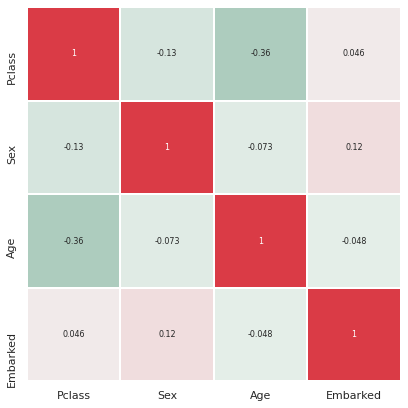

In [20]:
df_corr_result = X.corr(method='pearson')
plt.rcParams.update({'font.size': 8})
fig = plt.figure(figsize=(15/2.54,15/2.54))
ax = fig.add_axes([0.12,0.12,0.88,0.88]) # left, bot, width, height
cmap = sns.diverging_palette(150, 10, as_cmap=True)
sns.heatmap(df_corr_result, cmap=cmap, linewidths=1, annot=df_corr_result, vmin=-1, vmax = 1 , cbar = False, square =False, annot_kws={"size": 8})
#plt.savefig("/content/train/Pearson_heatmap_DS.jpeg")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


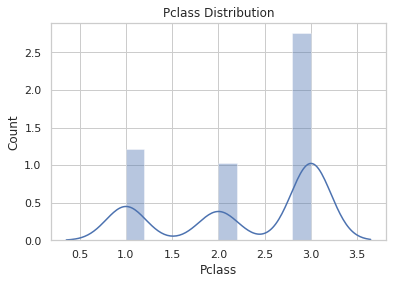

In [21]:
# Distribution Plots
plt.title("Pclass Distribution")
plt.xlabel("Pclass")
plt.ylabel("Count")
sns.distplot(X['Pclass'], kde=True, hist=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


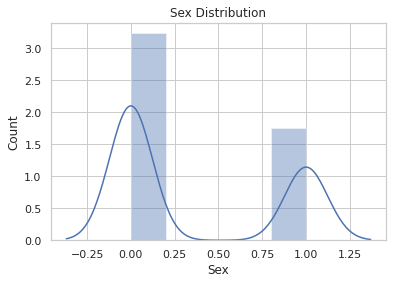

In [22]:
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
sns.distplot(X['Sex'], kde=True, hist=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


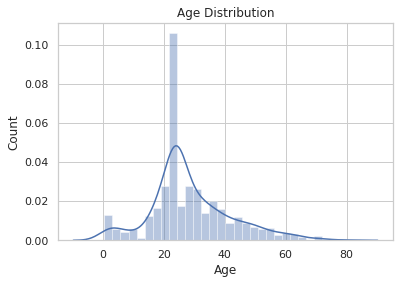

In [23]:
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
sns.distplot(X['Age'], kde=True, hist=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


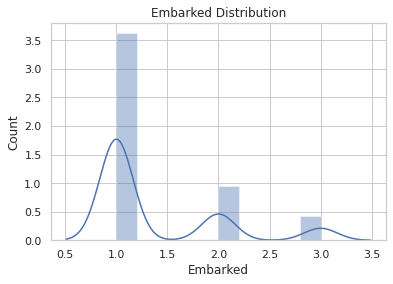

In [24]:
plt.title("Embarked Distribution")
plt.xlabel("Embarked")
plt.ylabel("Count")
sns.distplot(X['Embarked'], kde=True, hist=True)
plt.show()

## Data Splitting

10-Fold cross-validation and Train test split is used with 20% test data

In [25]:
# 10 fold Cross-validation
from sklearn.model_selection import KFold 

n_fold = 10
kf = KFold(n_splits=n_fold, shuffle = True, random_state= None )

In [26]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)


Shape of X_train:  (712, 4)
Shape of X_test:  (179, 4)
Shape of y_train:  (712,)
Shape of y_test:  (179,)


## Data Modelling

The Models used in this analysis are

* Logistic Regression
* k-Nearest Neighbors
* Decision Trees
* Support Vector Machine
* Naive Bayes
* Random Forest

#### Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(solver= 'liblinear')
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    logistic_model.fit(X_train,y_train)
    pred_values = logistic_model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/n_fold
 
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Avg accuracy : 0.784481897627965


#### K-nn Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_score=[]
knn_score_train=[]
k_range = range(1, 50)

for k in k_range:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  knn_score.append(metrics.accuracy_score(y_test, y_pred)) # Test accuracy score

  train_pred = knn_model.predict(X_train)
  knn_score_train.append(metrics.accuracy_score(y_train, train_pred)) # Train accuracy score
  
#print('knn_score: ', knn_score)

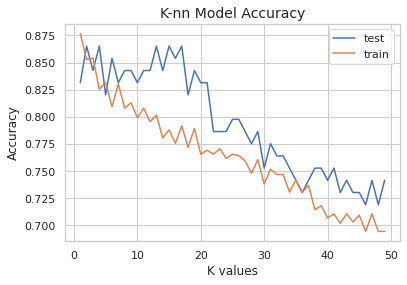

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, knn_score)
plt.plot(k_range, knn_score_train)

plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.legend(['test', 'train'])
plt.title('K-nn Model Accuracy', fontsize=14)
plt.show()

#### Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_accuracy = []
dt_train_accuracy = []
d_tree_depth = range(1,15)

for d in d_tree_depth:
  int_train_acc = 0
  int_test_acc = 0

  for train_index , test_index in kf.split(df):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    d_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    d_tree_model.fit(X_train, y_train)

    y_hat_pred = d_tree_model.predict(X_test)
    int_test_acc+=(metrics.accuracy_score(y_test, y_hat_pred))

    train_pred = d_tree_model.predict(X_train)
    int_train_acc+=(metrics.accuracy_score(y_train, train_pred))
    
  dt_accuracy.append(int_test_acc/n_fold) #average
  dt_train_accuracy.append((int_train_acc)/n_fold)#average

#print('dt_accuracy:', dt_accuracy)
#print('dt_train_accuracy:', dt_train_accuracy)

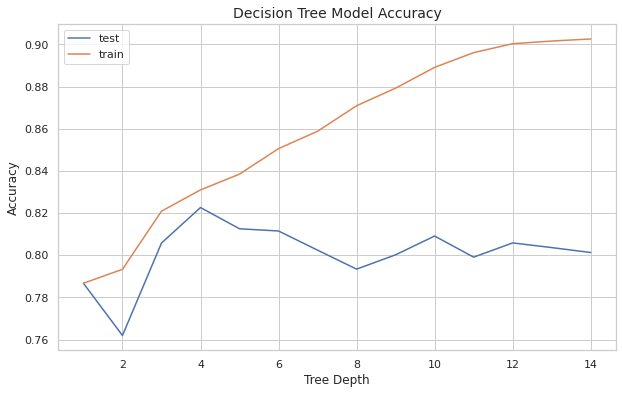

In [31]:
plt.figure(figsize=(10,6))
plt.plot(d_tree_depth, dt_accuracy)
plt.plot(d_tree_depth, dt_train_accuracy)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend(['test', 'train'])
plt.title('Decision Tree Model Accuracy', fontsize=14)
plt.show()

#### SVM Model

In [32]:
from sklearn import svm

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_score = []

for k in kernel_list:
  svm_model = svm.SVC(kernel = k)
  svm_model.fit(X_train, y_train)

  y_pred = svm_model.predict(X_test)
  kernel_score.append(metrics.accuracy_score(y_test, y_pred))

#print('kernel_score:', kernel_score)

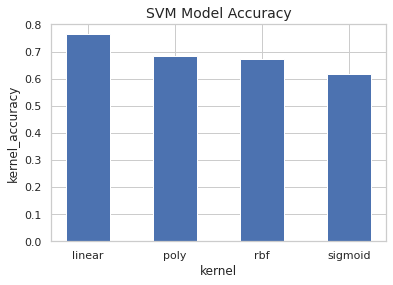

In [33]:
plt.bar(kernel_list, kernel_score, width=0.5)
plt.xlabel('kernel')
plt.ylabel('kernel_accuracy')
plt.title('SVM Model Accuracy', fontsize=14)
plt.show()

#### Naive Bayes Model

In [34]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

predicted= nb_model.predict(X_test) 
accuracy = metrics.accuracy_score(y_test, predicted)

predicted_train= nb_model.predict(X_train) 
accuracy_train = metrics.accuracy_score(y_train, predicted_train)

print('Test accuracy:', accuracy)
print('Train Accuracy', accuracy_train)

Test accuracy: 0.7640449438202247
Train Accuracy 0.7855361596009975


#### Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

Rf_score = []
Rf_score_Emb = []
Rf_score_train = []
n_range = range(5,30)

for n in n_range:
  rnd_frst_model = RandomForestClassifier(bootstrap=True, n_estimators= n, max_features = "sqrt")
  rnd_frst_model.fit(X_train,y_train)

  y_pred=rnd_frst_model.predict(X_test)
  Rf_score.append(metrics.accuracy_score(y_test, y_pred))

  df_train_pred=rnd_frst_model.predict(X_train)
  Rf_score_train.append(metrics.accuracy_score(y_train, df_train_pred))

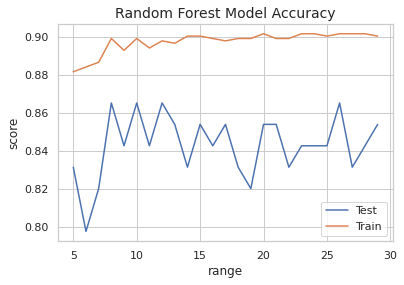

In [36]:
plt.plot(n_range, Rf_score)
plt.plot(n_range, Rf_score_train)
plt.xlabel('range')
plt.ylabel('score')
plt.legend(['Test', 'Train'])
plt.title('Random Forest Model Accuracy', fontsize=14)
plt.show()

## Model Selection

* Best accuracy is given by Random Forest, but it is showing Low Bias and High Variance. Hence it will not generalize on the unseen dataset.
 
* Naive Bayes showed good test accuracy, but the training accuracy was less, which implies high bias. i.e the model trained is not robust enough to produce an accurate prediction

* Next best accuracy is given by Decision Tree of depth 5, with low Bias and Variance. Hence it came out to be the best classifier.

## Test Data Analysis and Cleaning

In [37]:
df_test = pd.read_csv('train/test.csv')

In [38]:
df_test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [39]:
df_test.shape

(418, 11)

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [41]:
df_test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [42]:
# Checking missing values
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
# Missing values Imputation
# df_test[df_test['Age'].isna()]
df_test.Age = df_test['Age'].fillna(age_mode)
df_test.tail(12)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,24.0,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,24.0,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [44]:
# create a list of our conditions to fill column 'Sex'
conditions = [
    (df_test['Sex'] == 'male'),
    (df_test['Sex'] == 'female')
    ]

# create a list of the values we want to assign for each condition
values = [0 , 1]

# Fill existing column by using np.select to assign values to it using our lists as arguments
df_test['Sex'] = np.select(conditions, values)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
# create a list of our conditions to fill column 'Embarked'
conditions = [
    (df_test['Embarked'] == 'S'),
    (df_test['Embarked'] == 'C'),
    (df_test['Embarked'] == 'Q')
    ]
# create a list of the values we want to assign for each condition
values = [1, 2, 3]

# Fill existing column by using np.select to assign values to it using our lists as arguments
df_test['Embarked'] = np.select(conditions, values)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1


In [46]:
X_test_kaggle = df_test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Fare', 'SibSp', 'Parch'], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


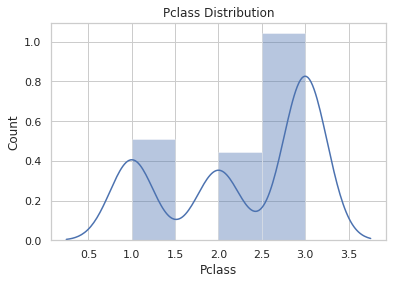

In [47]:
# Distribution Plots for Test data
plt.title("Pclass Distribution")
plt.xlabel("Pclass")
plt.ylabel("Count")
sns.distplot(X_test_kaggle['Pclass'], kde=True, hist=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


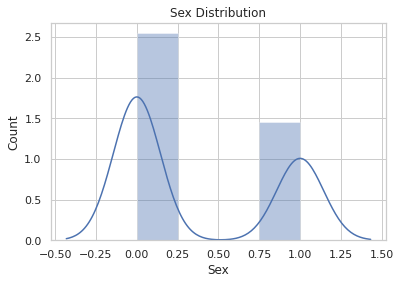

In [48]:
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
sns.distplot(X_test_kaggle['Sex'], kde=True, hist=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


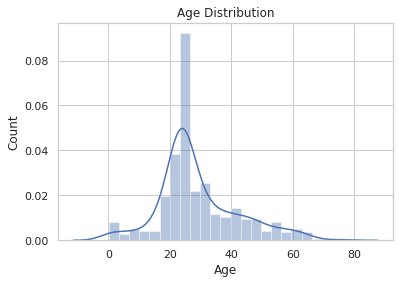

In [49]:
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
sns.distplot(X_test_kaggle['Age'], kde=True, hist=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


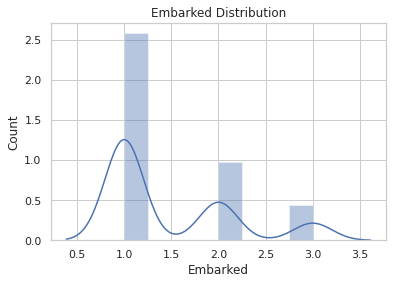

In [50]:
plt.title("Embarked Distribution")
plt.xlabel("Embarked")
plt.ylabel("Count")
sns.distplot(X_test_kaggle['Embarked'], kde=True, hist=True)
plt.show()

#### **Observation** - Both the train and test data have same distribution. Hence we can say that train and test data comes from the same source and the model created can be used to predict the test class

## Predicting on Test Data On Decision Tree with Depth 5


In [51]:
d_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
d_tree_model.fit(X_train, y_train)

df_pred_dt = pd.DataFrame(d_tree_model.predict(X_test_kaggle))

df_pred_dt.rename(columns={0: 'Survived'}, inplace=True)
df_pred_dt['PassengerId'] = df_test['PassengerId']
df_pred_dt = df_pred_dt[['PassengerId', 'Survived']]
df_pred_dt.head()
# Moving to CSV file
df_pred_dt.to_csv('submission_dt_depth_5.csv')
df_pred_dt.shape

(418, 2)

#### RESULT:

The best model i.e. Decision tree with depth 5 , resulted 78.7% accuracy for test data.